https://github.com/RomelTorres/av_example/blob/master/Alpha%20vantage%20examples.ipynb

In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Working with time Series
We first download the data with our api key.

In [6]:
API_KEY = os.environ['ALPHAVANTAGE_API_KEY']

In [16]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# We can describe it
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5171.000000,5171.000000,5171.000000,5171.000000,5.171000e+03
mean,213.372493,213.430720,213.312665,213.371317,3.889571e+04
std,1.922741,1.919119,1.928929,1.924532,9.566188e+04
min,208.320000,208.340000,208.160000,208.310000,1.000000e+02
25%,212.082500,212.150000,212.020000,212.081900,1.186000e+03
50%,213.930000,214.000000,213.870000,213.930000,2.696300e+04
75%,214.800000,214.860000,214.750000,214.800000,4.817600e+04
max,217.230000,217.320000,217.160000,217.241300,4.165419e+06


In [3]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-12-03 19:59:00,214.35,214.35,214.35,214.35,285.0
2020-12-03 19:58:00,214.37,214.37,214.36,214.36,471.0
2020-12-03 19:57:00,214.37,214.37,214.37,214.37,219.0
2020-12-03 19:56:00,214.37,214.37,214.37,214.37,600.0
2020-12-03 19:54:00,214.33,214.33,214.33,214.33,214.0


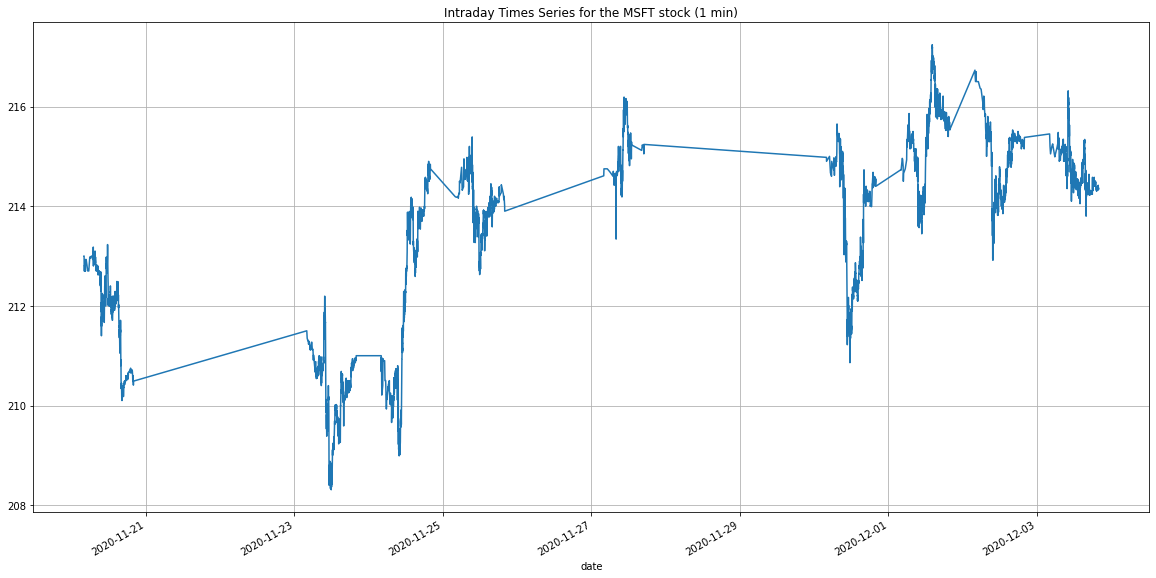

In [4]:
#data.describe()
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

Check the meta data given back by the api call.

In [5]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2020-12-03 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

## Getting csv data

https://realpython.com/python-csv/

In [12]:
ts = TimeSeries(key=API_KEY, output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

In [13]:
list(data_csv)

[['timestamp', 'open', 'high', 'low', 'close', 'volume'],
 ['2020-12-03 19:59:00',
  '214.3500',
  '214.3500',
  '214.3500',
  '214.3500',
  '285'],
 ['2020-12-03 19:58:00',
  '214.3700',
  '214.3700',
  '214.3600',
  '214.3600',
  '471'],
 ['2020-12-03 19:57:00',
  '214.3700',
  '214.3700',
  '214.3700',
  '214.3700',
  '219'],
 ['2020-12-03 19:56:00',
  '214.3700',
  '214.3700',
  '214.3700',
  '214.3700',
  '600'],
 ['2020-12-03 19:54:00',
  '214.3300',
  '214.3300',
  '214.3300',
  '214.3300',
  '214'],
 ['2020-12-03 19:52:00',
  '214.4200',
  '214.4200',
  '214.4200',
  '214.4200',
  '1000'],
 ['2020-12-03 19:51:00',
  '214.3400',
  '214.3400',
  '214.3300',
  '214.3300',
  '651'],
 ['2020-12-03 19:50:00',
  '214.3500',
  '214.3500',
  '214.3500',
  '214.3500',
  '251'],
 ['2020-12-03 19:46:00',
  '214.4000',
  '214.4000',
  '214.4000',
  '214.4000',
  '480'],
 ['2020-12-03 19:24:00',
  '214.3300',
  '214.3800',
  '214.3300',
  '214.3800',
  '6393'],
 ['2020-12-03 19:23:00',
  '21

## Plotting time series

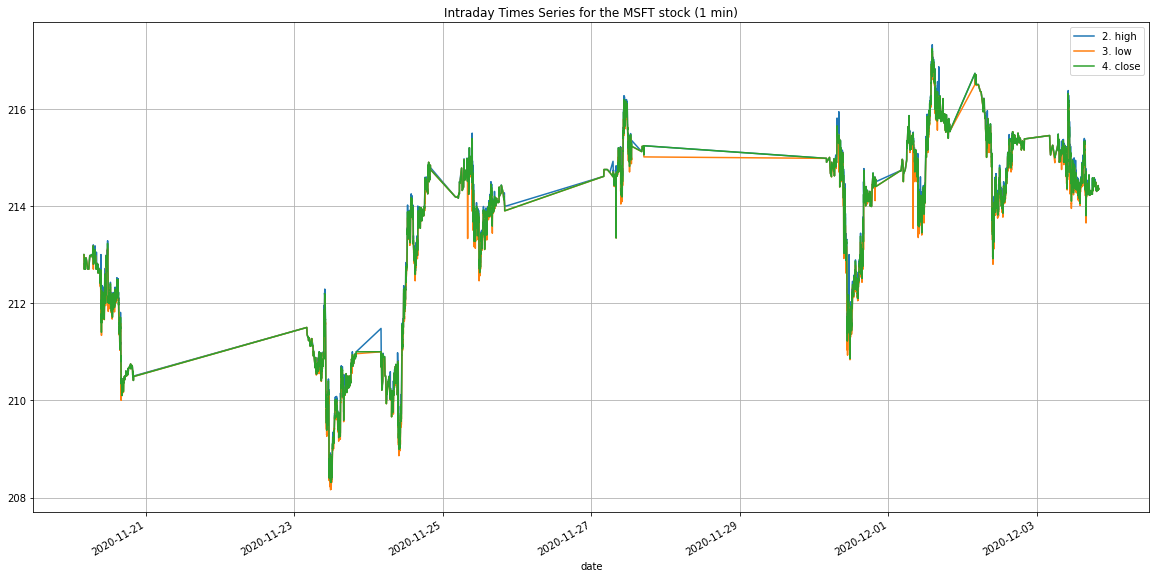

In [17]:
data = data.drop('1. open',1)
data = data.drop('5. volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

In [18]:
type(data)

pandas.core.frame.DataFrame

# Working with batch quotes

no longer available

In [31]:
data.head(3)

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
0,MSFT,86.3000,--,2018-01-03 15:59:59
1,FB,184.4800,--,2018-01-03 15:59:58
2,AAPL,172.0600,--,2018-01-03 15:59:58


# Working with technical indicators

In [20]:
ti = TechIndicators(key=API_KEY, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Lower Band,Real Upper Band,Real Middle Band
count,575.000000,575.000000,575.000000
mean,208.608686,219.284323,213.946505
std,5.753012,5.551447,4.498732
min,194.295200,205.550800,202.632100
25%,207.661250,216.223650,212.064400
50%,209.721700,217.630300,214.581100
75%,212.568500,223.732050,216.900350
max,216.393700,230.191800,220.801400


In [21]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2020-12-03 20:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

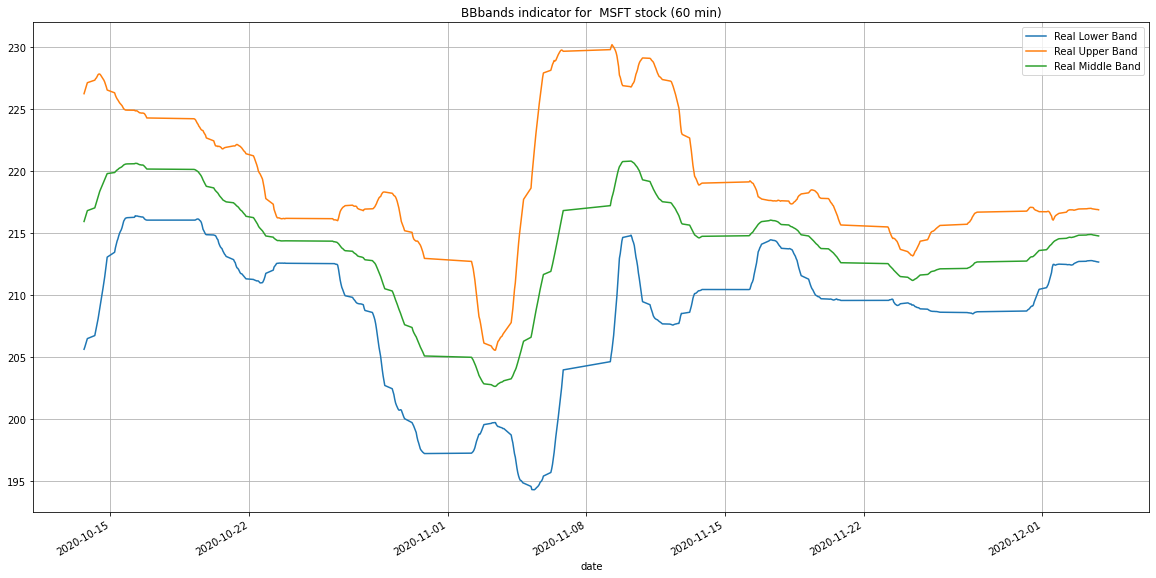

In [22]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

In [23]:
ti = TechIndicators(key=API_KEY, output_format='pandas')
data, meta_data = ti.get_sma(symbol='MSFT')

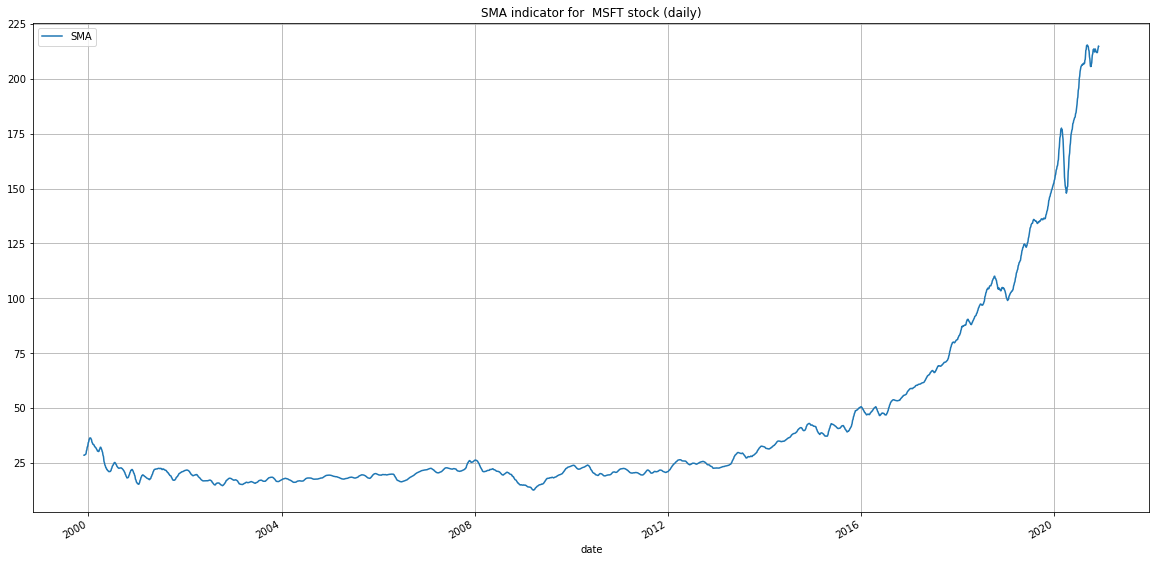

In [25]:
data.plot()
plt.title('SMA indicator for  MSFT stock (daily)')
plt.grid()
plt.show()

# Working with Sector Performance

In [26]:
sp = SectorPerformances(key=API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000
mean,-0.000182,-0.000182,0.000591,0.104682,0.039682,0.065609,0.102691,0.255300,0.602910,1.701750
std,0.006028,0.006028,0.017597,0.076395,0.048853,0.200080,0.209156,0.363317,0.587948,1.413847
min,-0.011000,-0.011000,-0.021500,-0.016400,-0.018500,-0.370500,-0.334100,-0.440200,-0.409000,-0.407600
25%,-0.002850,-0.002850,-0.012800,0.065900,-0.000750,-0.040800,-0.009450,0.112150,0.454625,0.963525
50%,0.000100,0.000100,-0.000600,0.085800,0.023400,0.080400,0.096300,0.193600,0.528400,1.323500
75%,0.001900,0.001900,0.012600,0.125450,0.076350,0.179150,0.217900,0.373400,0.572325,2.344825
max,0.010700,0.010700,0.027100,0.278400,0.123000,0.360200,0.440500,0.991900,1.953300,4.506200


In [27]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2020-12-04 07:27:30 US/Eastern'}

## Plotting Sector Performance

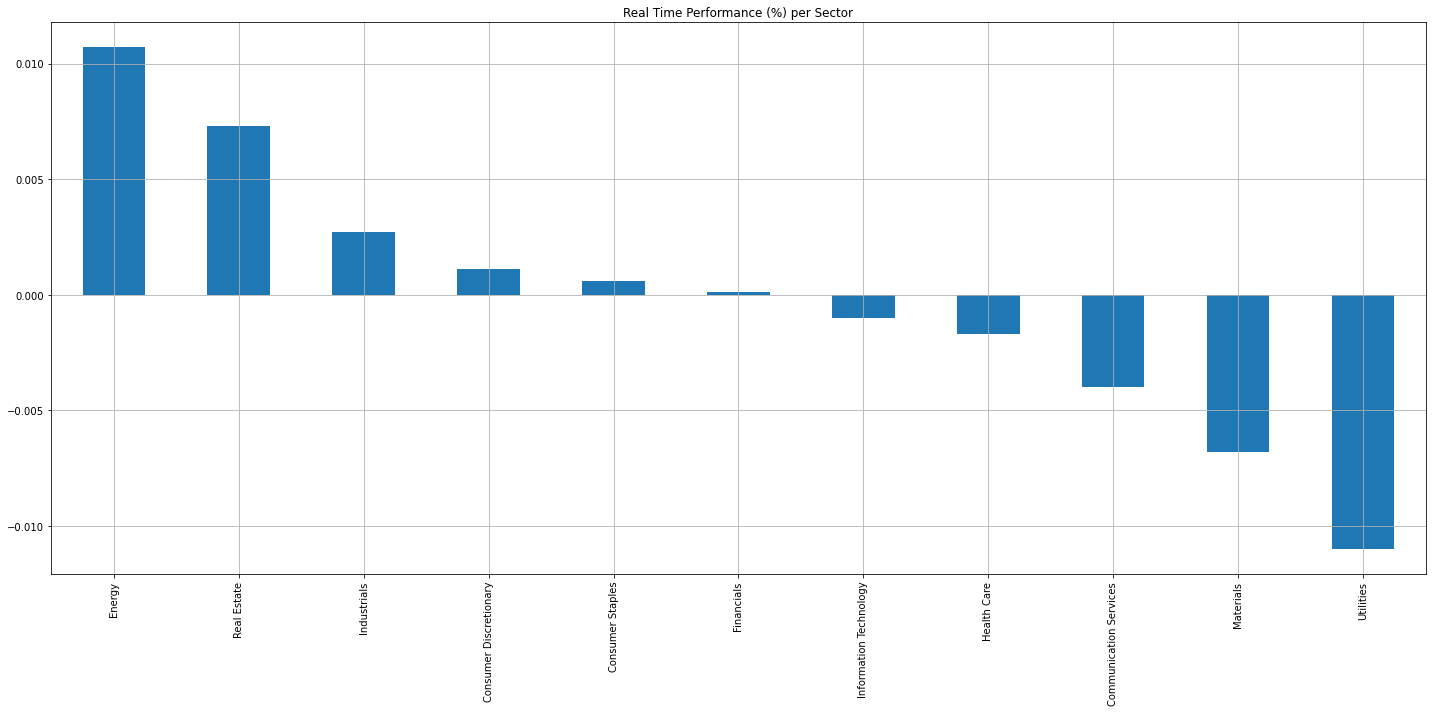

In [28]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [29]:
cc = CryptoCurrencies(key=API_KEY)

To get the intraday price of bitcoin 

In [31]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
# data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

data.describe()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53156.742812,8124.33979,54458.217942,8323.253900,51756.711717,7910.362640,53226.942895,8135.068990,49761.455062,49761.455062
std,18651.708478,2850.67913,19163.572253,2928.911072,18136.882563,2771.994462,18798.380527,2873.096108,32431.665638,32431.665638
min,21013.897359,3211.71000,21437.811850,3276.500000,20651.093554,3156.260000,21013.962788,3211.720000,2248.224117,2248.224117
25%,42314.193808,6467.19250,43067.036240,6582.255000,41383.940643,6325.015000,42311.380361,6466.762500,29466.674424,29466.674424
50%,52663.016952,8048.88000,53880.192639,8234.910000,51050.977250,7802.500000,52669.690710,8049.900000,41687.520564,41687.520564
75%,63275.780682,9670.90750,64681.473675,9885.750000,61675.567271,9426.335000,63320.861263,9677.797500,60466.872929,60466.872929
max,128868.107823,19695.87000,130125.195200,19888.000000,126794.335668,19378.920000,128868.107823,19695.870000,402201.673764,402201.673764


In [32]:
data.head(5)

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2020-12-04,127078.428386,19422.34,127763.208300,19527.00,126794.335668,19378.92,127400.404495,19471.55,2248.224117,2248.224117
2020-12-03,125650.375032,19204.08,128227.754200,19598.00,123446.202880,18867.20,127075.549510,19421.90,66689.391279,66689.391279
2020-12-02,122777.256784,18764.96,126552.771800,19342.00,119931.357000,18330.00,125650.440461,19204.09,75911.013478,75911.013478
2020-12-01,128868.107823,19695.87,130125.195200,19888.00,117779.528048,18001.12,122777.256784,18764.96,127698.762652,127698.762652
2020-11-30,118982.636500,18185.00,129962.669564,19863.16,118982.571071,18184.99,128868.107823,19695.87,115463.466888,115463.466888


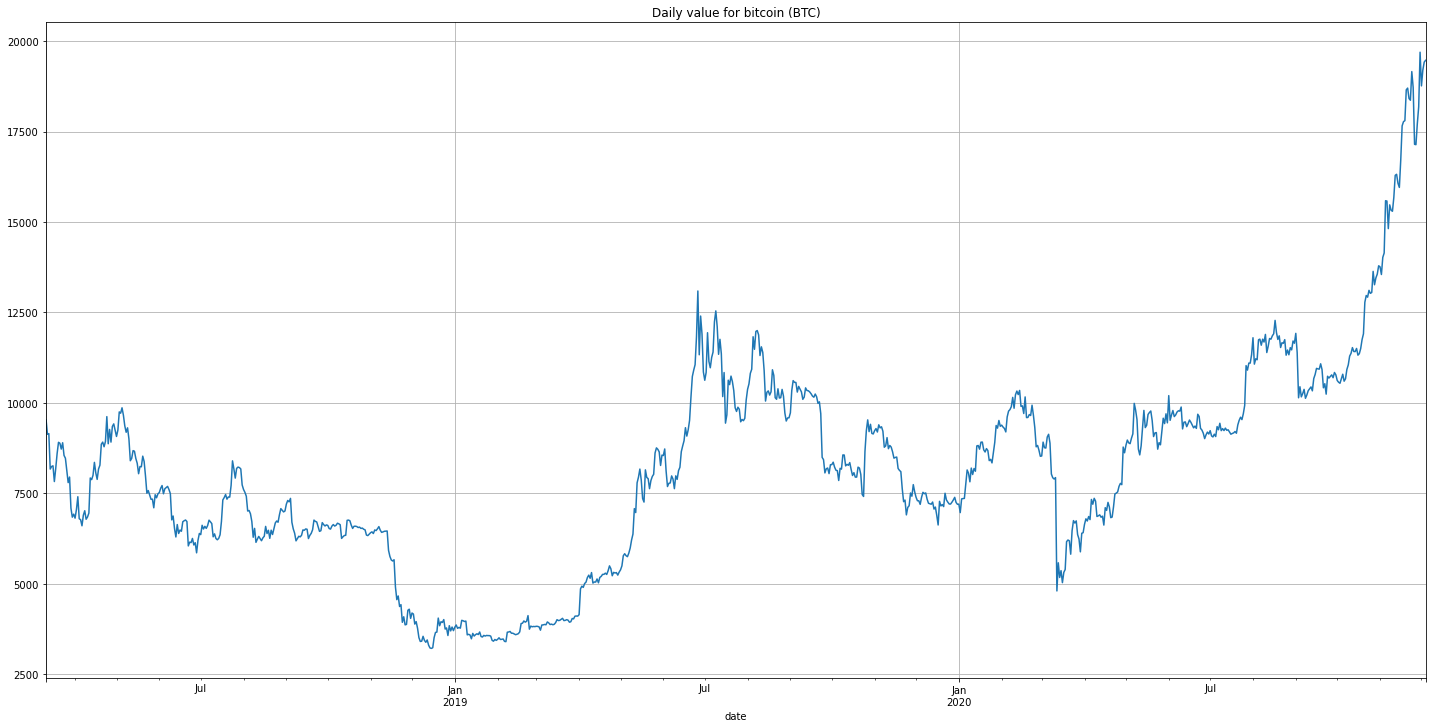

In [33]:
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily value for bitcoin (BTC)')
plt.grid()
plt.show()